In [10]:
### IGNORE THIS -- THIS IS JUST DATA FORMATTING STUFF TO MAKE THE .pickle FILE

#dx = pd.read_csv('dx.csv',header=None)
#Nx = pd.read_csv('Nx.csv',header=None)
#Ny = pd.read_csv('Ny.csv',header=None)
#x_coast_NARR = pd.read_csv('x_coast_NARR.csv',header=None)
#x_dom = pd.read_csv('x_dom.csv',header=None)
#x_domp = pd.read_csv('x_domp.csv',header=None)
#x_GCM = pd.read_csv('x_GCM.csv',header=None)
#x_NARR = pd.read_csv('x_NARR.csv',header=None)
#xE = pd.read_csv('xE.csv',header=None)
#xW = pd.read_csv('xW.csv',header=None)
#y_coast_NARR = pd.read_csv('y_coast_NARR.csv',header=None)
#y_dom = pd.read_csv('y_dom.csv',header=None)
#y_domp = pd.read_csv('y_domp.csv',header=None)
#y_GCM = pd.read_csv('y_GCM.csv',header=None)
#y_NARR = pd.read_csv('y_NARR.csv',header=None)
#yN = pd.read_csv('yN.csv',header=None)
#yS = pd.read_csv('yS.csv',header=None)

#coordinates_for_plots_dict = {
#    'dx':dx.get_values(),
#    'Nx':Nx.get_values(),
#    'Ny':Ny.get_values(),
#    'x_coast_NARR':x_coast_NARR.get_values(),
#    'x_dom':x_dom.get_values(),
#    'x_domp':x_domp.get_values(),
#    'x_GCM':x_GCM.get_values(),
#    'x_NARR':x_NARR.get_values(),
#    'xE':xE.get_values(),
#    'xW':xW.get_values(),
#    'y_coast_NARR':y_coast_NARR.get_values(),
#    'y_dom':y_dom.get_values(),
#    'y_domp':y_domp.get_values(),
#    'y_GCM':y_GCM.get_values(),
#    'y_NARR':y_NARR.get_values(),
#    'yN':yN.get_values(),
#    'yS':yS.get_values(),
#}

#pickle_out = open("coordinates_for_plots.pickle","wb")
#pickle.dump(coordinates_for_plots_dict, pickle_out)
#pickle_out.close()

#pickle_in = open("coordinates_for_plots.pickle","rb")
#coordinates_for_plots_dict = pickle.load(pickle_in)

In [133]:
#import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import pickle
from netCDF4 import Dataset

In [62]:
#load useful data for making plots and unpack into individual variables 
pickle_in = open("coordinates_for_plots.pickle","rb")
coordinates_for_plots_dict = pickle.load(pickle_in)

dx = coordinates_for_plots_dict['dx'][0][0]
Nx = coordinates_for_plots_dict['Nx'][0][0]
Ny = coordinates_for_plots_dict['Ny'][0][0]
x_coast_NARR = coordinates_for_plots_dict['x_coast_NARR'][0]
x_dom = coordinates_for_plots_dict['x_dom'][0]
x_domp = coordinates_for_plots_dict['x_domp'][0]
x_GCM = coordinates_for_plots_dict['x_GCM'][0]
x_NARR = coordinates_for_plots_dict['x_NARR']
xE = coordinates_for_plots_dict['xE'][0]
xW = coordinates_for_plots_dict['xW'][0]
y_coast_NARR = coordinates_for_plots_dict['y_coast_NARR'][0]
y_dom = coordinates_for_plots_dict['y_dom'][0]
y_domp = coordinates_for_plots_dict['y_domp'][0]
y_GCM = coordinates_for_plots_dict['y_GCM'][0]
y_NARR = coordinates_for_plots_dict['y_NARR']
yN = coordinates_for_plots_dict['yN'][0]
yS = coordinates_for_plots_dict['yS'][0]
incrop = pd.read_csv('incrop.csv',header=None)

# Example 1
PCA on real data.  Gridded daily sea level pressure data for North Pacific domain from CFSR climate reanalysis.  Period: 1 Jan 1979 to 31 Dec 2010.  The .csv file is organized so that rows are grid cells (representing the SLP value (Pa) for given latitude and longitude) while columns are days (1979 - 2010).

NOTE: This isn't the exact same as the MATLAB scripts -- the only difference is that the MATLAB version clips the domain to a smaller segment.  If anyone looks at both and has a simple python script for it, please let me know.

In [110]:
#load sea level pressure data
#NOTE: The sea level pressure file is large (>100MB), so you will have to download it and change the path here

#change 'SLP_directory' to wherever you've saved the SLP file
SLP_directory = '/Users/samanderson/Desktop/MATLAB/Teaching/EOSC_410/Valentina_files/Tutorial4_2018/'
SLP_filename = 'SLP_CFSR_daily_200km_cropped_1979_2010.csv'
SLP = pd.read_csv(SLP_directory + SLP_filename,header=None)

#rows 0 and 54 are all NaN -- fill with adjacent values 
SLP.iloc[0] = SLP.iloc[1]
SLP.iloc[54] = SLP.iloc[53]

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  import sys


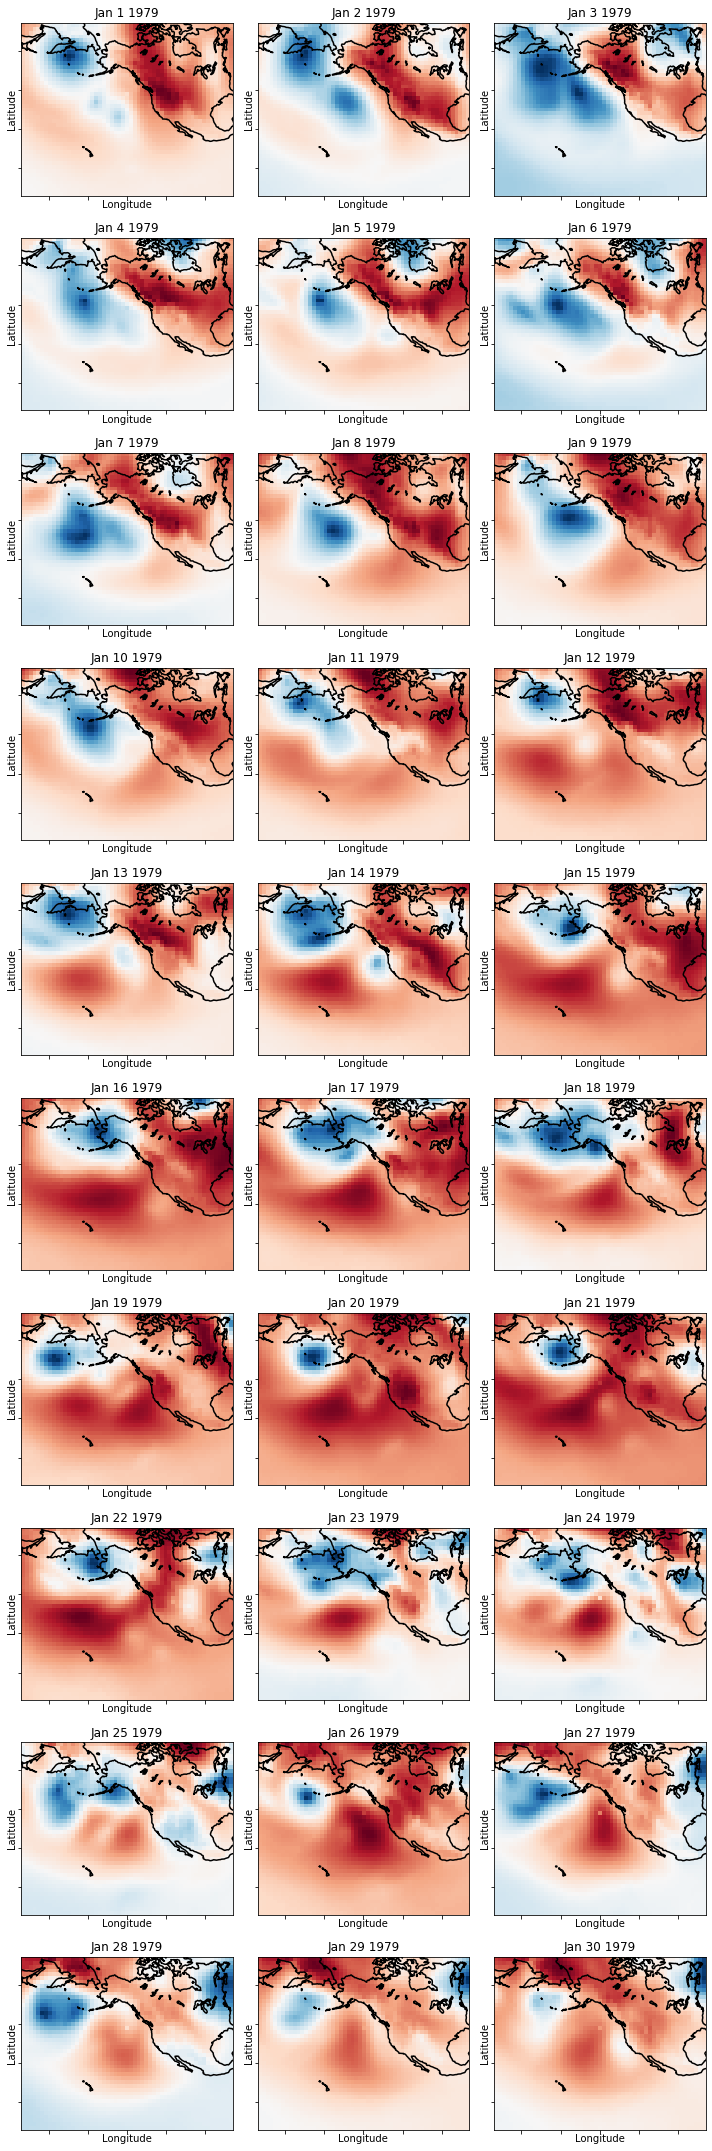

In [111]:
#try plotting the data for January 1979 to see what we're working with

plt.figure(figsize=(10,30))

for ii in range(30):
    
    SLP_plot = np.reshape(SLP[ii].get_values(),(Ny,Nx))
    extent = [np.nanmin(x_NARR), np.nanmax(x_NARR), np.nanmin(y_NARR), np.nanmax(y_NARR)]
    
    plt.subplot(10,3,ii+1)
    plt.imshow(np.flipud(SLP_plot),extent = extent,cmap='RdBu_r')
    plt.plot(x_coast_NARR,y_coast_NARR,color='k')
    
    plt.title('Jan '+str(ii+1)+' 1979')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim((np.nanmin(x_NARR), np.nanmax(x_NARR)))
    plt.ylim((np.nanmin(y_NARR), np.nanmax(y_NARR)))
    plt.tick_params(labelbottom=False, labelleft=False)

plt.tight_layout()
plt.show()

In [117]:
#now, do PCA

n_modes = np.min(np.shape(SLP))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(SLP.T)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

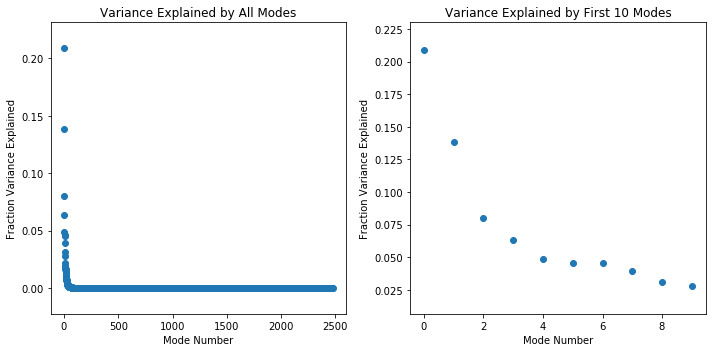

In [118]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

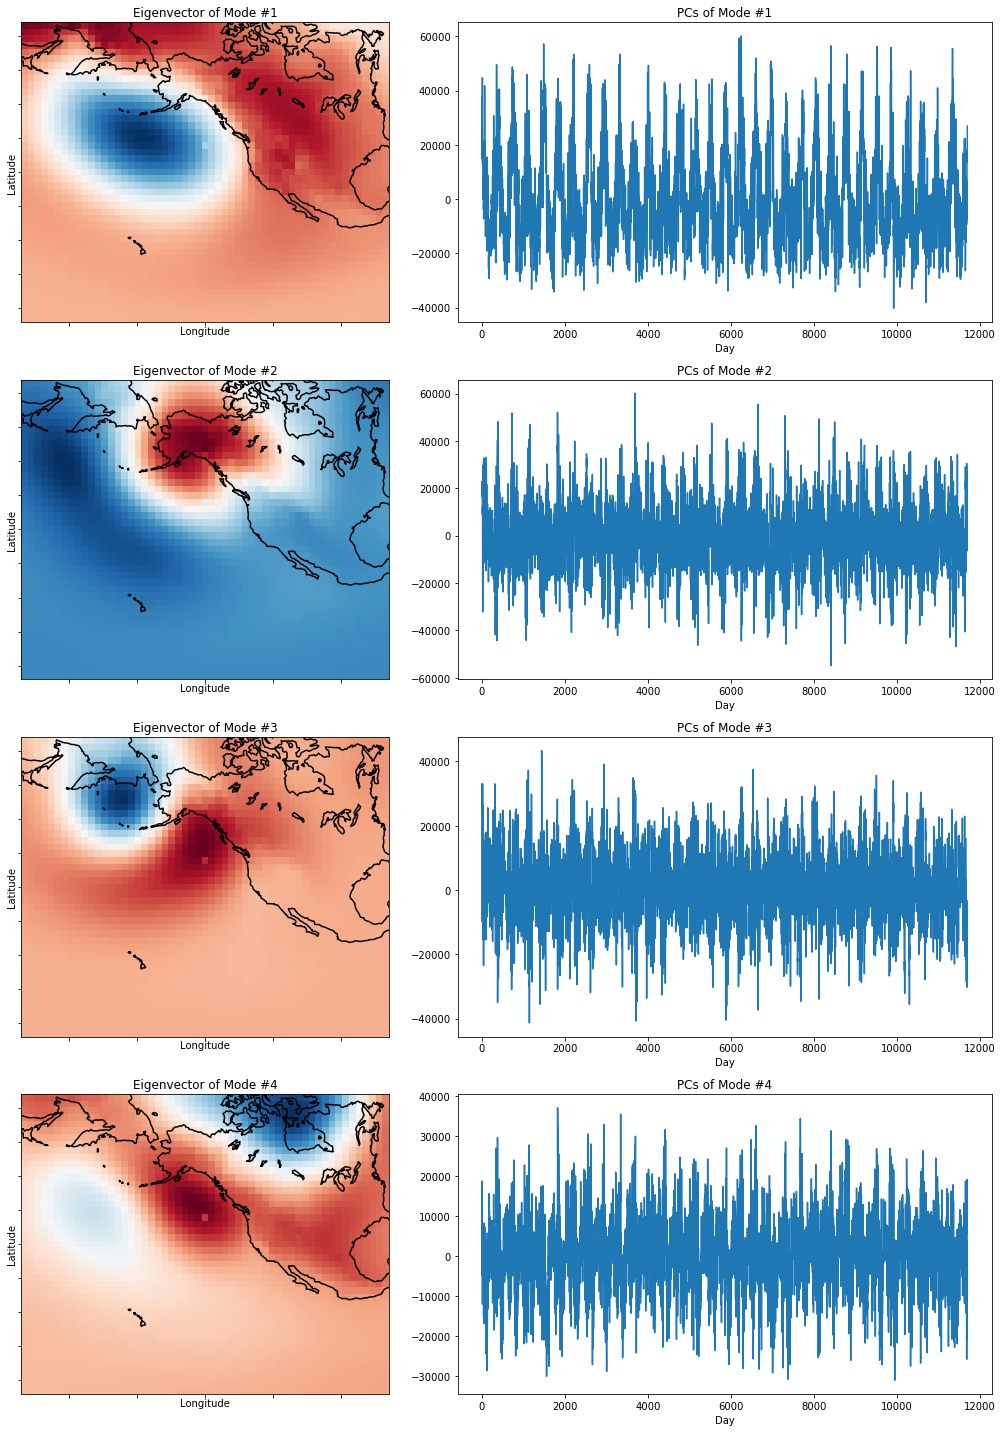

In [121]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!

n = 4

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.imshow(np.flipud(np.reshape(eigvecs[kk],(Ny,Nx))),extent = extent,cmap='RdBu_r')
    plt.plot(x_coast_NARR,y_coast_NARR,color='k')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim((np.nanmin(x_NARR), np.nanmax(x_NARR)))
    plt.ylim((np.nanmin(y_NARR), np.nanmax(y_NARR)))
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Day')
    
plt.tight_layout()

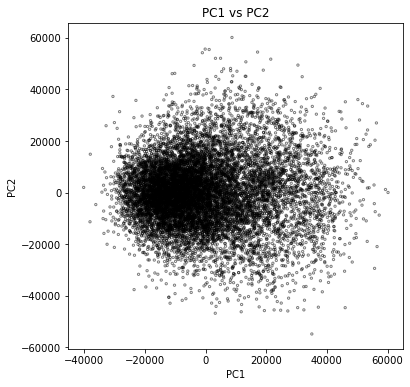

In [132]:
#plot PC1 vs PC2 

plt.figure(figsize=(6,6))
plt.scatter(PCs[:,0],PCs[:,1],s=5,facecolors=[],edgecolors='k',alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.show()

# Example 2
Gridded monthly sea surface temperatuer data for the tropical Pacific from ERA interim reanalysis.  Period: Jan 1979 to Jun 2017

In [135]:
#load SST data from .csv file and check it out; rows are months, columns are locations
dataSST = pd.read_csv('SST_anomalies_data.csv',header=None)
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dataSST.head()
SST_extent=[-360+159.75,-360+260.25,-10.5,10.5] #these are just the known boundaries of the SST grid [lonmin,lonmax,latmin,latmax] for plotting

#load coastline data
coasts = pd.read_csv('coastline.csv',header=None)
coastLat = coasts[0]
coastLon = coasts[1]

In [152]:
#reformat data from 3D to 2D, where rows are grid points, columns are months

T2d = np.empty((np.shape(T)[1]*np.shape(T)[2],np.shape(T)[0]))
for ii in range(np.shape(T)[0]):
    T2d[:,ii] = np.reshape(T[ii],(np.shape(T)[1]*np.shape(T)[2],))

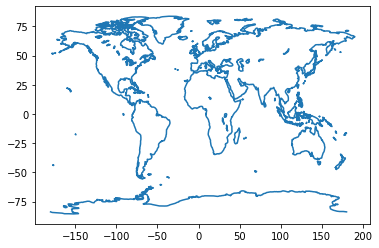

In [172]:
plt.plot(coastLon,coastLat)

In [168]:
np.asarray(np.squeeze(T[0,:,:]))

array([[   300.94365534,    300.91180652,    300.87995771, ...,
           300.42152211,    300.40971931,    300.2727694 ],
       [   301.1525461 ,    301.08866112,    301.07011387, ...,
           300.27876447,    300.27670367,    300.16935442],
       [   301.4035897 ,    301.32509174,    301.31216487, ...,
           300.005052  ,    300.02584741,    299.97507665],
       ...,
       [   302.50687015,    302.1366745 ,    302.12112479, ...,
           297.52084438,    297.48318784,    297.49761348],
       [   302.08590374, -32767.        ,    302.12580844, ...,
           297.48862087,    297.44028561,    297.43803746],
       [   302.41844285,    302.26332038,    302.20280763, ...,
           297.4569594 ,    297.39101362,    297.36740803]])

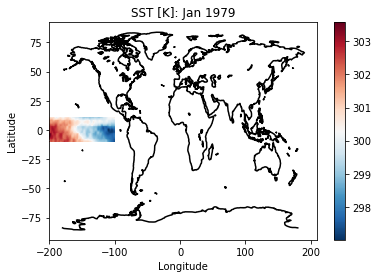

In [178]:
#plot temp over whole domain Jan 1979

lonERAmin = np.min(lonERA)
lonERAmax = np.max(lonERA)
latERAmin = np.min(latERA)
latERAmax = np.max(latERA)
T_extent = [lonERAmin,lonERAmax,latERAmin,latERAmax]
plt.imshow(np.squeeze(T[0,:,:]),extent=T_extent,cmap = 'RdBu_r',aspect='auto')
plt.plot(coastLon,coastLat,c='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('SST: Jan 1979')
plt.colorbar()

plt.show()

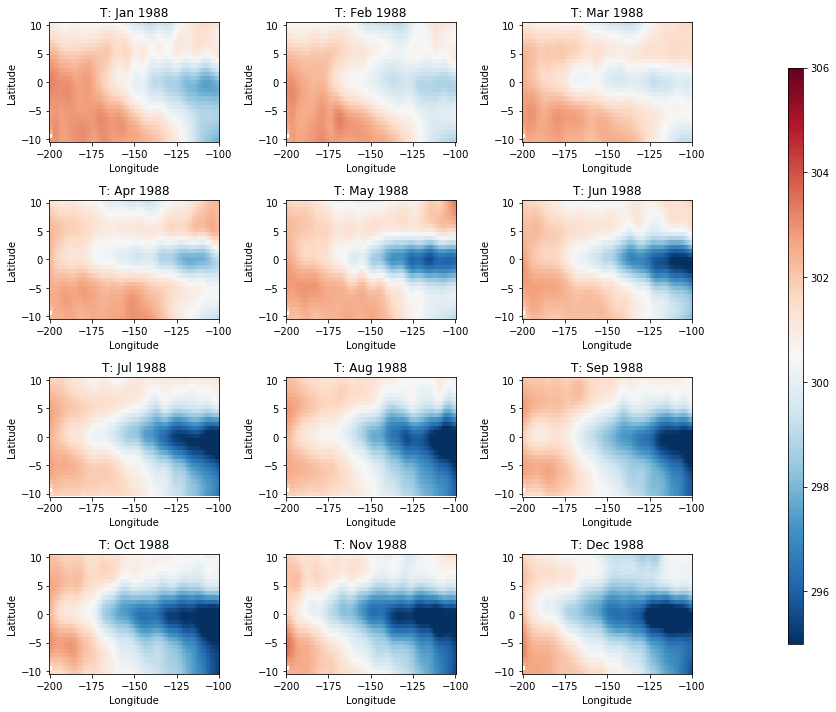

In [185]:
#plot temp for each month in 1988, since this year had a strong La Nina event

#vmin = np.min([T[12*9+month,:,:] for month in range(12)])
#vmax = np.max([T[12*9+month,:,:] for month in range(12)])
vmin = 273+22
vmax = 273+33


fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

month = 0
for ax in axes.flat:
    #ax.set_axis_off()
    im = ax.imshow(np.squeeze(T[12*9+month,:,:]), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('T: ' + months[month] +' 1988')
    #plt.colorbar()
    month+=1
 
plt.tight_layout()
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

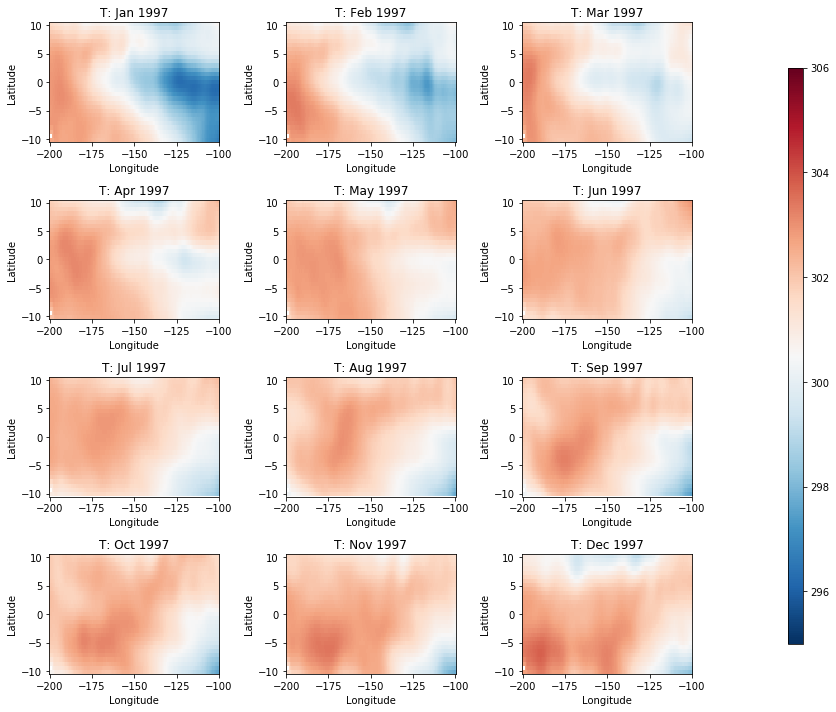

In [186]:
#plot temp for each month in 1997, since this year had a strong El Nino event

#vmin = np.min([T[12*18+month,:,:] for month in range(12)])
#vmax = np.max([T[12*18+month,:,:] for month in range(12)])
vmin = 273+22
vmax = 273+33

fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

month = 0
for ax in axes.flat:
    #ax.set_axis_off()
    im = ax.imshow(np.squeeze(T[12*18+month,:,:]), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('T: ' + months[month] +' 1997')
    #plt.colorbar()
    month+=1
    
plt.tight_layout()    
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

Preprocessing: remove seasonal cycle and apply 3-month running mean -- we want smoothed anomalies!

In [143]:
#remove last 7 months from 2017, so the timeseries line up
T_cut = T[:-7]
T2d_cut = T2d[:,:-7]

#calculate seasonal signal for each grid point
nyears = 38
T2d_seasonal = np.empty((np.shape(T2d)[0],12))
for ii in range(len(T2d_cut)):
    T2d_seasonal[ii,:] = np.mean(np.reshape(T2d_cut[ii,:],(nyears,12)),axis=0)

#repeat the seasonal cycle for all years
T2d_seasonal_all = np.tile(T2d_seasonal,(1,nyears))

#remove seasonal cycle from the original data (calculate anomalies)
T2d_anomalies = T2d_cut - T2d_seasonal_all

#apply 3-month running mean on each grid point 
T2d_anomalies_smooth = np.empty_like(T2d_anomalies)
N=3 #length of moving window
for ii in range(len(T2d_anomalies)):
    x=T2d_anomalies[ii,:]
    T2d_anomalies_smooth[ii,:] = np.convolve(x, np.ones((N,))/N, mode='same')


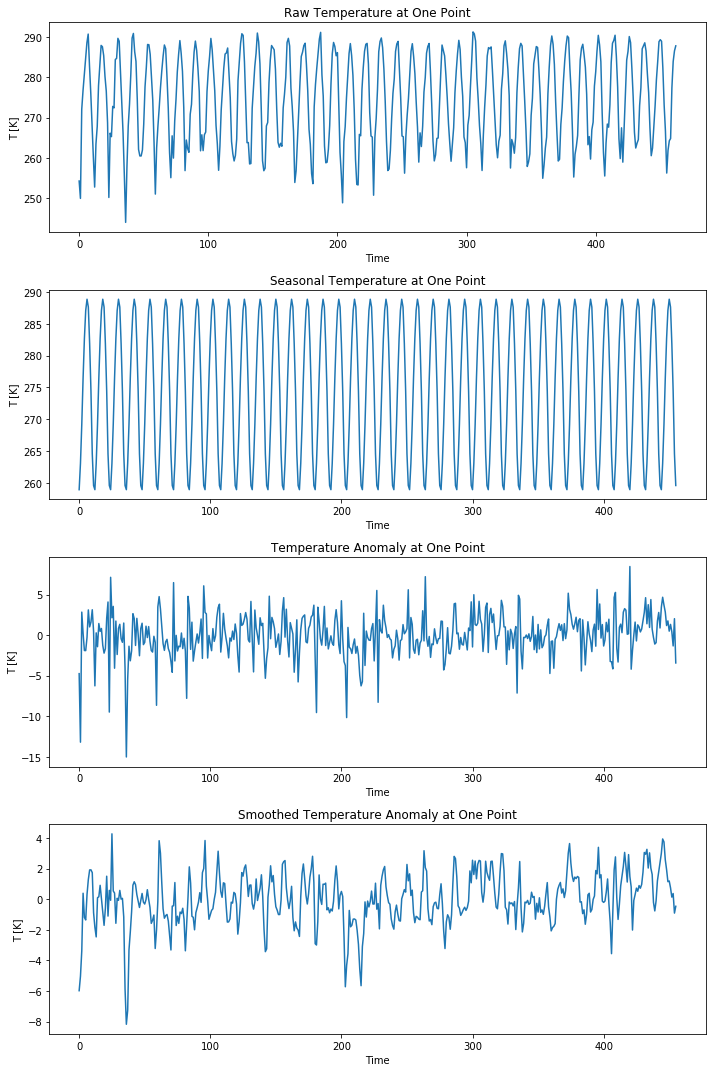

In [144]:
#let's visualize all of these great pre-processing steps!

gridIndex = 50 #arbitrary grid point to visualize the preprocessing for

plt.figure(figsize=(10,15))

plt.subplot(4,1,1)
plt.plot(T2d[gridIndex,:])
plt.xlabel('Time')
plt.ylabel('T [K]')
plt.title('Raw Temperature at One Point')

plt.subplot(4,1,2)
plt.plot(T2d_seasonal_all[gridIndex,:])
plt.xlabel('Time')
plt.ylabel('T [K]')
plt.title('Seasonal Temperature at One Point')

plt.subplot(4,1,3)
plt.plot(T2d_anomalies[gridIndex,:])
plt.xlabel('Time')
plt.ylabel('T [K]')
plt.title('Temperature Anomaly at One Point')

plt.subplot(4,1,4)
plt.plot(T2d_anomalies_smooth[gridIndex,:])
plt.xlabel('Time')
plt.ylabel('T [K]')
plt.title('Smoothed Temperature Anomaly at One Point')

plt.tight_layout()
plt.show()

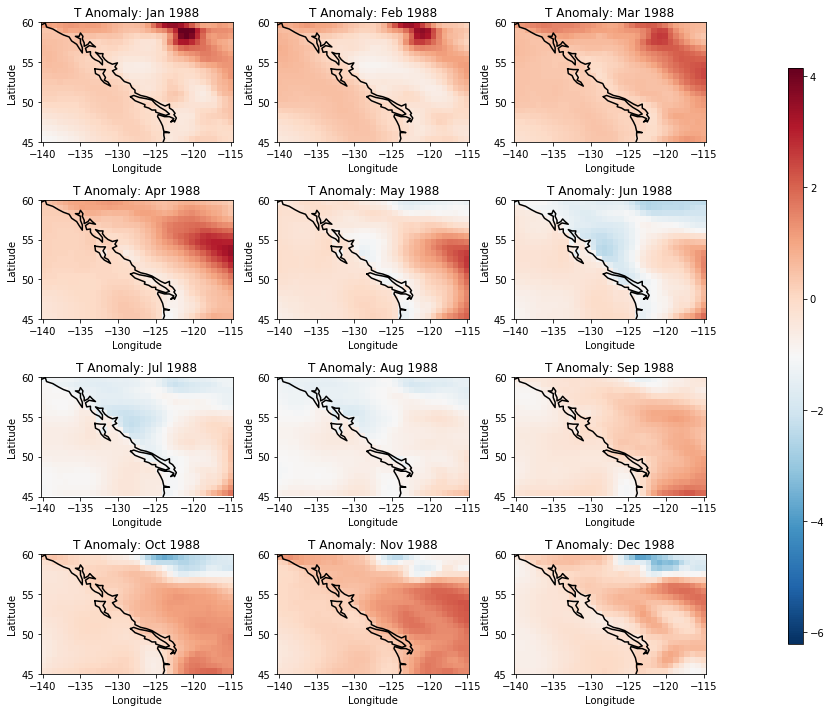

In [145]:
#plot the 3-month running mean of residuals for all grid points for all months of 1988

vmin = np.min([T2d_anomalies_smooth[12*9+month,:] for month in range(12)])
vmax = np.max([T2d_anomalies_smooth[12*9+month,:] for month in range(12)])

fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

month = 0
for ax in axes.flat:
    #ax.set_axis_off()
    im = ax.imshow(np.asarray(np.reshape(T2d_anomalies_smooth[:,12*9+month],(21,35))), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('T Anomaly: ' + months[month] +' 1988')
    month+=1
    
plt.tight_layout()   
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

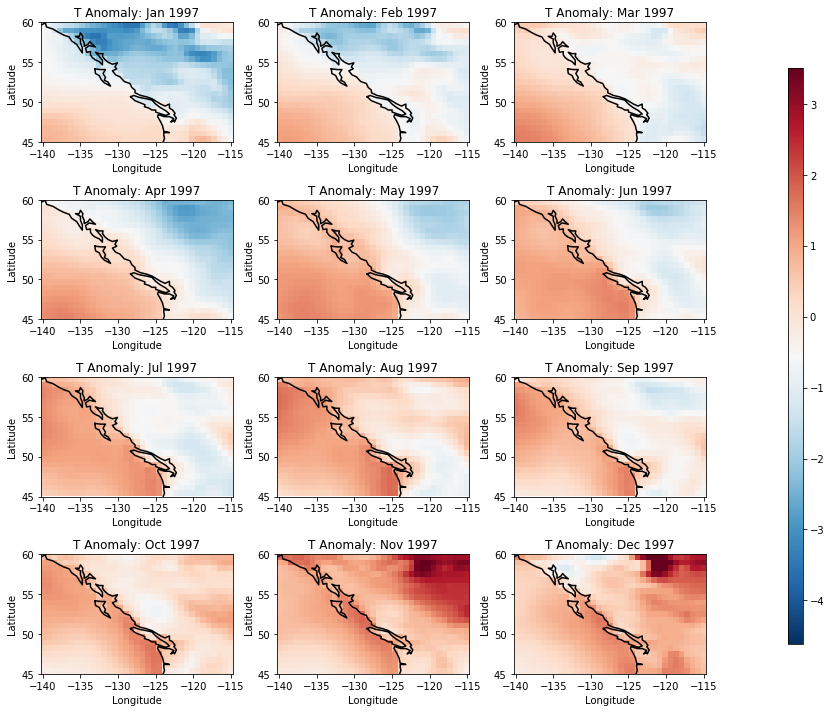

In [146]:
#plot the 3-month running mean of residuals for all grid points for all months of 1997

vmin = np.min([T2d_anomalies_smooth[12*18+month,:] for month in range(12)])
vmax = np.max([T2d_anomalies_smooth[12*18+month,:] for month in range(12)])

fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

month = 0
for ax in axes.flat:
    im = ax.imshow(np.asarray(np.reshape(T2d_anomalies_smooth[:,12*18+month],(21,35))), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('T Anomaly: ' + months[month] +' 1997')
    #plt.colorbar()
    month+=1

plt.tight_layout()
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

In [147]:
#do PCA using built-in library

data = T2d_anomalies_smooth.T

n_modes = np.min(np.shape(data))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

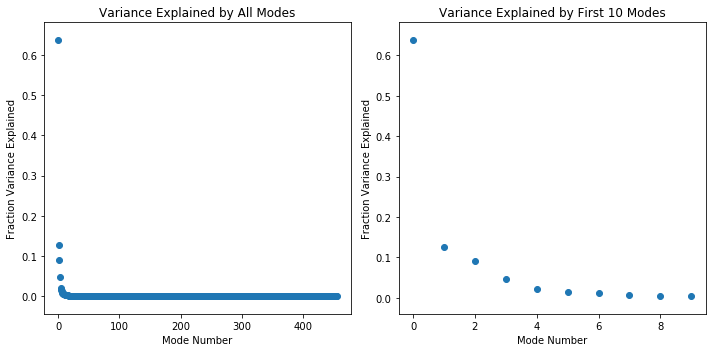

In [148]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

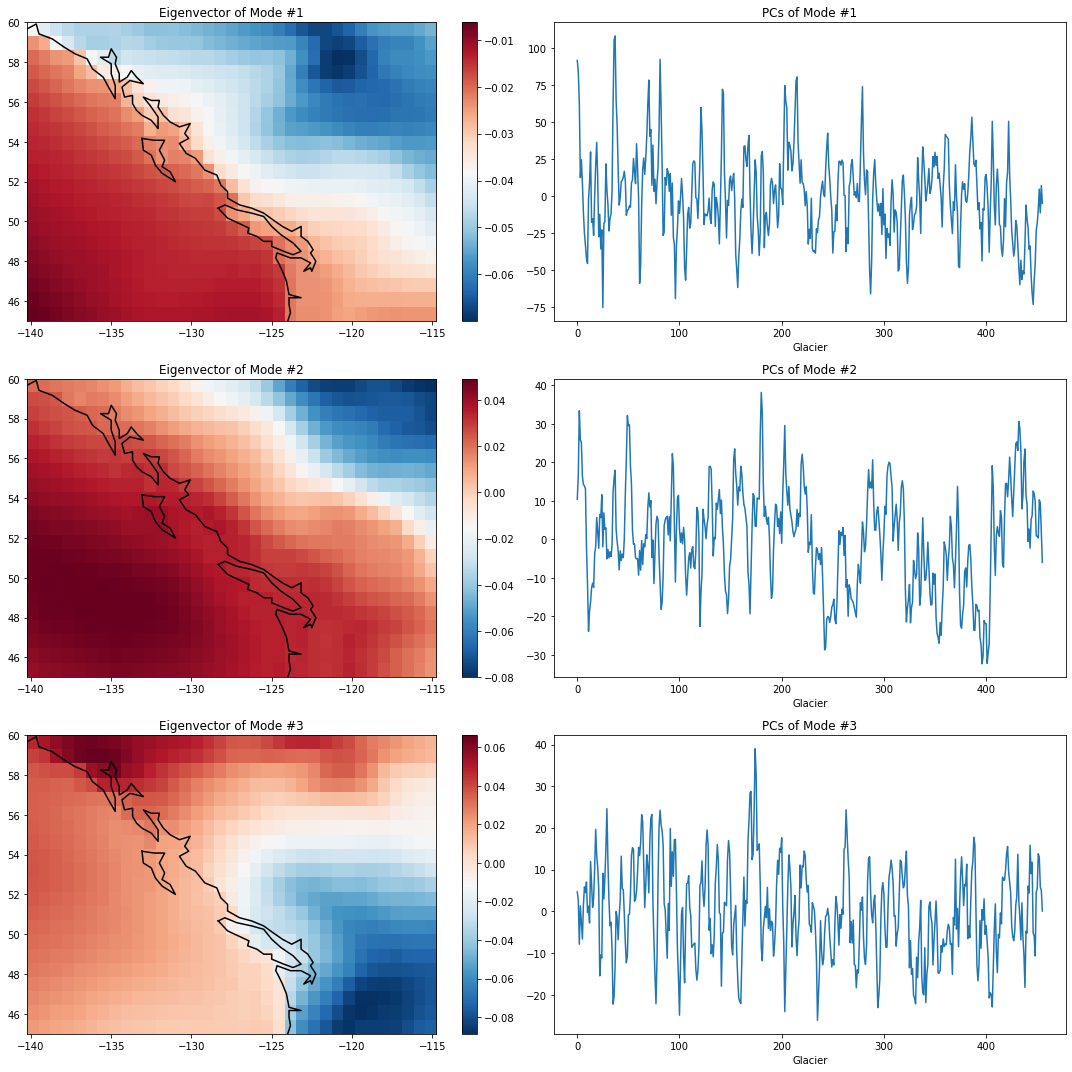

In [149]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!

n = 3

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.imshow(np.reshape(eigvecs[kk,:],(21,35)),extent=T_extent,cmap = 'RdBu_r',aspect='auto')
    plt.plot(coastLon,coastLat,c='k')
    plt.xlim(T_extent[:2])
    plt.ylim(T_extent[2:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    plt.colorbar()
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Glacier')
    
    plt.tight_layout()